# Example output featured in RAMP's publication in JOSS

The code in this notebook showcases how to produce a typical RAMP visual output. The same output is used as an illustrative figure in RAMP's publication in JOSS.

### Step 1. Importing some of the user types available from the Example Input File 1

In [3]:
from ramp import UseCase
from ramp.example.input_file_1 import LMI, LI

LMI.num_users = 2
LI.num_users = 1

### Step 2. Creating a UseCase and generating a list of load profiles

In [5]:
uc = UseCase("JOSS-paper-figure", users=[LMI, LI])
uc.initialize(num_days=5)

my_profiles_list = uc.generate_daily_load_profiles(flat='False')

You will simulate 5 day(s) from 2024-05-08 00:00:00 until 2024-05-13 00:00:00


### Step 3. Post-processing and plotting

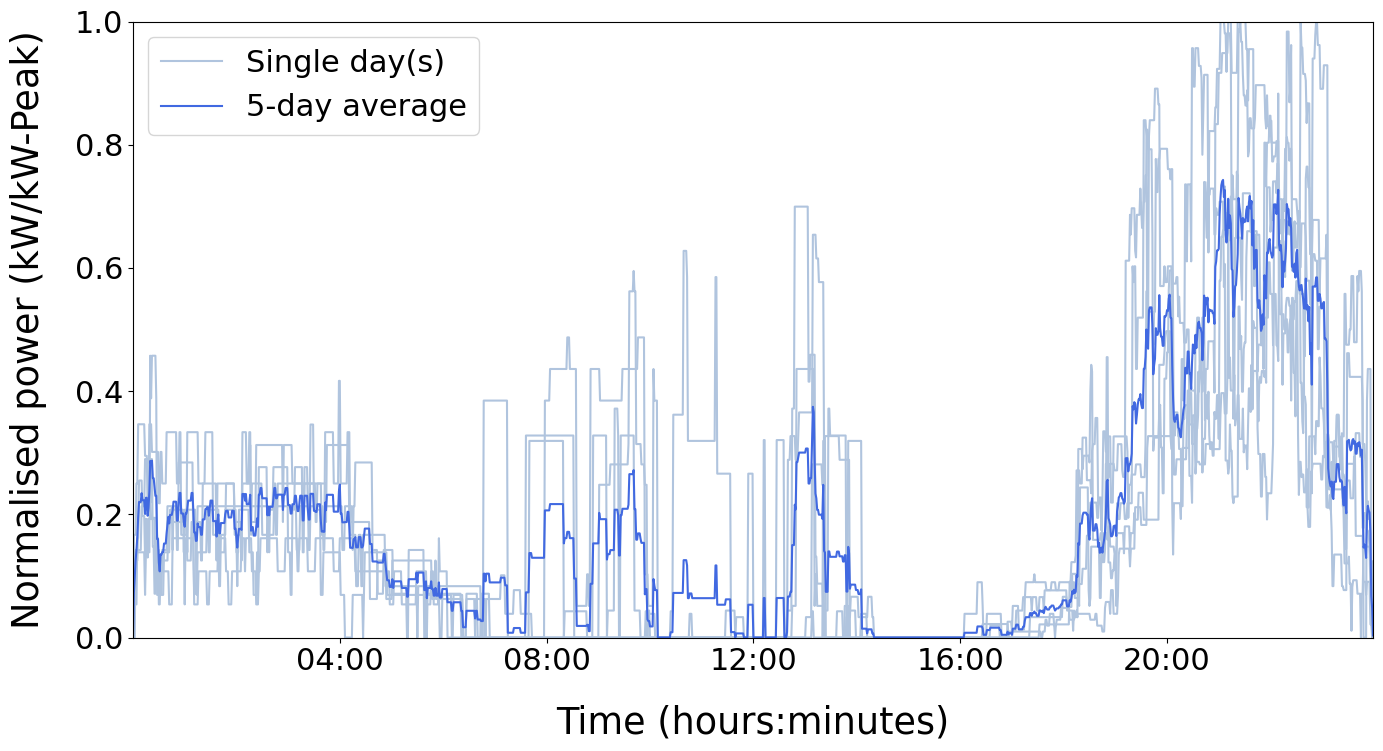

In [23]:
# Creating a custom plot function based on the default 'plot cloud' functionality

import matplotlib.pyplot as plt 
from matplotlib.ticker import FormatStrFormatter
import pandas as pd

def plot_cloud(df_profiles_list):
    plt.rcParams.update({'font.size': 22})
    fig = plt.figure(figsize=(16, 8))
    ax1=fig.add_subplot(111)
    
    normalised_load = df_profiles_list/df_profiles_list.max()
    ax1.plot(normalised_load[0], color='#b0c4de', label='Single day(s)')
    ax1.plot(normalised_load[[1,2,3,4]], color='#b0c4de')
    ax1.plot(normalised_load.mean(axis=1), color='#4169e1', label='5-day average')
     
    ax1.margins(0)
    ax1.set_xticks([60*4,60*8,60*12,60*16,60*20])
    ax1.set_xticklabels(['04:00','08:00','12:00','16:00','20:00'])
    ax1.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])
    ax1.set_ylabel('Normalised power (kW/kW-Peak)', fontsize='large', labelpad=20)
    ax1.set_xlabel('Time (hours:minutes)', fontsize='large', labelpad=20)
    ax1.legend()
    ax1.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

    return

# Calling the plot function
my_df_profiles = pd.DataFrame(my_profiles_list).T
plot_cloud(my_df_profiles)